## Predicto api for Python - example usage
Sample usage to retrieve latest forecasts and trade picks programmatically (https://predic.to)

To use predicto api and reproduce this notebook, you'll need to have a valid Predicto account. 
If you don't have one, you can create one here: https://predic.to and get a free trial period.

To authenticate you'll need an api session id. To retrieve it, login to https://predic.to and head to your [settings page](https://predic.to/account), or press F12 for Developer Tools window in your browser, find any request to https://predic.to and copy the Cookie `session` contents in Request Headers, then paste it in the `api_session_id` variable below.

If you get any exception/error while running below code, please make sure your api session id is correct and your subscription/trial is not expired.
Please note that there is a limit to the number of requests you can make per minute, depending on your account type.

### Import needed packages

In [1]:
import sys
sys.path.append("../predicto_api/")

import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import IPython.display as display

from predicto_api_wrapper import PredictoApiWrapper

### Prepare and initialize our Predicto wrapper
You'll need to have a valid Predicto account as mentioned above, and get an api session id. Then replace the `api_session_id` variable below

In [2]:
api_session_id = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
api_wrapper = PredictoApiWrapper(api_session_id)

### Let's start by retrieving all supported tickers
We generate forecasts and trade picks for a limited amount of stocks for the time being

In [3]:
# Get all supported stocks
stocks_df = api_wrapper.get_supported_tickers(True)

# print some information
print('Total tickers supported: {0}'.format(len(stocks_df)))
print('Here is a sample:')
stocks_df.head(15)

Total tickers supported: 47
Here is a sample:


,RelatedCompany,RelatedStock
0,AMD,AMD
1,Activision,ATVI
2,Alibaba,BABA
3,Amazon,AMZN
4,American Airlines,AAL
5,Apple,AAPL
6,Baidu,BIDU
7,Bank of America,BAC
8,Booking Holdings,BKNG
9,Chevron,CVX


### Now, let's retrieve Predicto forecasts and tradepicks generated 1 day ago.
Define a method to retrieve a ticker's forecast and generate trade on a specific date

In [4]:
# Let's inspect forecasts and trade picks that were generated yesterday
sdate = (datetime.today() - timedelta(days=1)).strftime('%Y-%m-%d')

# method for easy inspection of a ticker's forecast
def get_forecast_and_tradepick_info(ticker, sdate):
    print('Forecast for {0} on {1}'.format(ticker, sdate))
    
    forecast_df = api_wrapper.get_forecast(ticker, sdate, True)
    trade_pick_df = api_wrapper.get_trade_pick(ticker, sdate, True)
    
    forecast_df.Prediction.plot()
    plt.show()
    
    print('Trade Pick generated based on forecast for {0} on {1}'.format(ticker, sdate))
    print('  (Note: Action 1=BUY, 2=SELL)')
    print('---------------------------------------')
    print('Action          : \t{0}'.format(trade_pick_df.loc['TradeAction']['Value']))
    print('Entry price     : \t{0}'.format(trade_pick_df.loc['StartingPrice']['Value']))
    print('Target price    : \t{0}'.format(trade_pick_df.loc['TargetSellPrice']['Value']))
    print('StopLoss price  : \t{0}'.format(trade_pick_df.loc['TargetStopLossPrice']['Value']))
    print('Expiration Date : \t{0}'.format(trade_pick_df.loc['ExpirationDate']['Value']))
    print('---------------------------------------')
    print()
    print()

### Let's inspect forecasts and trade picks that were generated yesterday (All forecasts are for 15 days ahead)

In [5]:
sdate = (datetime.today() - timedelta(days=1)).strftime('%Y-%m-%d')
print(sdate)

2020-11-27


### Let's see what forecast we got for Apple (AAPL)
We predict a minor down trend forecast, and recommended action is SELL with entry/target/stopLoss prices.

Forecast for AAPL on 2020-11-27


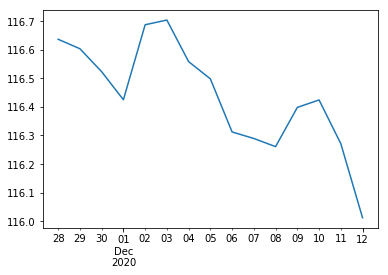

Trade Pick generated based on forecast for AAPL on 2020-11-27
  (Note: Action 1=BUY, 2=SELL)
---------------------------------------
Action          : 	2
Entry price     : 	116.59
Target price    : 	116.3345315145
StopLoss price  : 	116.6538671214
Expiration Date : 	Friday, Dec 11
---------------------------------------




In [6]:
get_forecast_and_tradepick_info('AAPL', sdate)

### Let's see what forecast we got for NIO (NIO)
We predict a minor up trend forecast, and recommended action is BUY with entry/target/stopLoss prices and expiration date.

Forecast for NIO on 2020-11-27


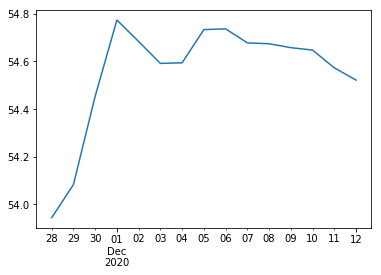

Trade Pick generated based on forecast for NIO on 2020-11-27
  (Note: Action 1=BUY, 2=SELL)
---------------------------------------
Action          : 	1
Entry price     : 	54.0
Target price    : 	54.2899243768
StopLoss price  : 	53.9275189058
Expiration Date : 	Friday, Dec 11
---------------------------------------




In [7]:
get_forecast_and_tradepick_info('NIO', sdate)

### We can also inspect recent performance graphs for a model
Let's inspect recent performance of AAPL model

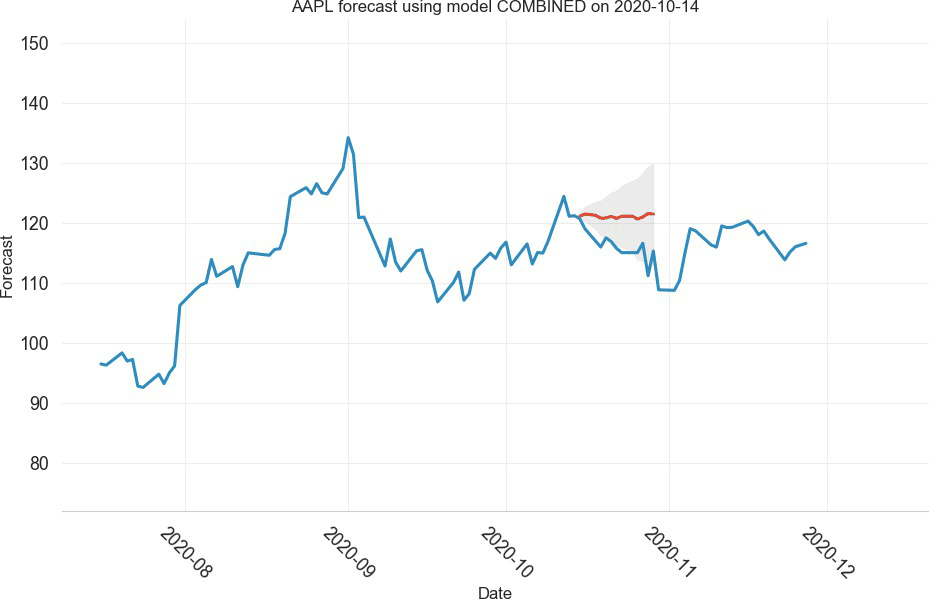

In [8]:
blob_url = api_wrapper.get_model_recent_performance_graph('AAPL')
display.Image(requests.get(blob_url).content)